# Chapter 7. Tibbles with tibble

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(IRdisplay)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Creating Tibbles

> Almost all of the functions that you’ll use in this book produce tibbles, as tibbles are one of the unifying features of the tidyverse.

In [2]:
as_tibble(iris) %>% head(10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [3]:
tibble(x = 1:5, y = 1, z = x^2 + y)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


> It’s possible for a tibble to have column names that are not valid R variable names, aka *nonsyntactic* names.

In [4]:
tibble(`:)` = "smile", ` ` = "space", `2000` = "number") %>% print

# A tibble: 1 x 3
  `:)`  ` `   `2000`
  <chr> <chr> <chr> 
1 smile space number


> Another way to create a tibble is with `tribble()`, short for *transposed tibble*. `tribble()` is customized for data entry in code: column headings are defined by formulas (i.e., they start with `~`), and entries are separated by commas.

In [5]:
tribble(
  ~x, ~y, ~z,
  "a", 2, 3.6,
  "b", 1, 8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


In [6]:
tibble(
  a = lubridate::now() + runif(1e3) * lubridate::ddays(),
  b = lubridate::date(lubridate::today() + runif(1e3) * lubridate::dmonths()),
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
) %>%
  print(10, width = Inf)

# A tibble: 1,000 x 5
   a                   b              c     d e    
   <dttm>              <date>     <int> <dbl> <chr>
 1 2020-12-29 06:50:46 2021-01-21     1 0.372 e    
 2 2020-12-29 07:47:21 2021-01-16     2 0.725 q    
 3 2020-12-28 17:34:18 2020-12-31     3 0.510 b    
 4 2020-12-28 21:37:16 2020-12-30     4 0.551 j    
 5 2020-12-29 05:56:05 2021-01-17     5 0.101 i    
 6 2020-12-29 07:30:26 2021-01-01     6 0.624 v    
 7 2020-12-29 02:56:07 2021-01-27     7 0.924 j    
 8 2020-12-28 21:18:41 2021-01-03     8 0.522 m    
 9 2020-12-29 02:41:31 2021-01-26     9 0.500 b    
10 2020-12-28 20:53:30 2021-01-21    10 0.502 q    
# … with 990 more rows


In [7]:
package?tibble

tibble-package {tibble},R Documentation


In [8]:
head(nycflights13::flights)$year
head(nycflights13::flights)[["year"]]
head(nycflights13::flights)[[1]]

[1] 2013 2013 2013 2013 2013 2013

[1] 2013 2013 2013 2013 2013 2013

[1] 2013 2013 2013 2013 2013 2013

### Exercises

1. How can you tell if an object is a tibble? (Hint: try printing `mtcars`, which is a regular data frame.)
1. Compare and contrast the following operations on a `data.frame` and equivalent tibble. What is different? Why might the default data frame behaviors cause you frustration?

    ```r
    df <- data.frame(abc = 1, xyz = "a")
    df$x
    df[, "xyz"]
    df[, c("abc", "xyz")]
    ```

1. If you have the name of a variable stored in an object, e.g., `var <- "mpg"`, how can you extract the reference variable from a tibble?
1. Practice referring to nonsyntactic names in the following data frame by:

    1. Extracting the variable called 1.
    1. Plotting a scatterplot of 1 versus 2.
    1. Creating a new column called 3, which is 2 divided by 1.
    1. Renaming the columns to one, two, and three:

        ```r
        annoying <- tibble(
          `1` = 1:10,
          `2` = `1` * 2 + rnorm(length(`1`))
        )
        ```

1. What does `tibble::enframe()` do? When might you use it?
1. What option controls how many additional column names are printed at the footer of a tibble?

In [9]:
# 1.
class(mtcars)
class(as_tibble(mtcars))
class(as_tibble(mtcars))[1]

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

[1] "tbl_df"

In [10]:
# 2.
df <- data.frame(abc = 1, xyz = "a")
df$x
df[, "xyz"]
df[, c("abc", "xyz")]

display_markdown("---")

tbl_df <- as_tibble(df)
tbl_df$xyz
tbl_df[, "xyz"]$xyz
tbl_df[, c("abc", "xyz")]

[1] "a"

[1] "a"

abc,xyz
<dbl>,<chr>
1,a


---

[1] "a"

[1] "a"

abc,xyz
<dbl>,<chr>
1,a


In [11]:
# 3.
as_tibble(mtcars)[["mpg"]]

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

[1]  1  2  3  4  5  6  7  8  9 10

1,2,3
<int>,<dbl>,<dbl>
1,1.669607,1.669607
2,6.445369,3.222684
3,3.251845,1.083948
4,7.561451,1.890363
5,10.267279,2.053456
6,11.119071,1.853178
7,14.680977,2.097282
8,15.007839,1.875980
9,18.537831,2.059759


one,two
<int>,<dbl>
1,1.669607
2,6.445369
3,3.251845
4,7.561451
5,10.267279
6,11.119071
7,14.680977
8,15.007839
9,18.537831


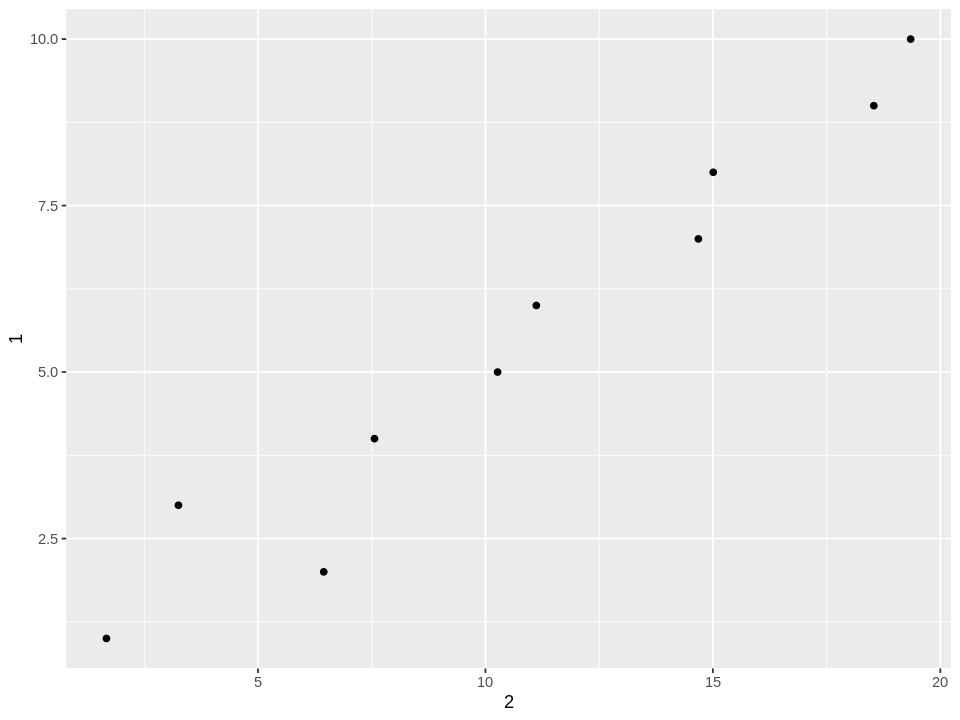

In [12]:
# 4.
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

# 4.A.
annoying$`1`

# 4.B.
qplot(`2`, `1`, data = annoying)

# 4.C.
mutate(annoying, `3` = `2` / `1`)

# 4.D.
rename(annoying, c("one" = `1`, "two" = `2`))

In [13]:
# 5.
x <- 1:10; names(x) <- letters[1:10]; x
enframe(x)

a  b  c  d  e  f  g  h  i  j 
 1  2  3  4  5  6  7  8  9 10

name,value
<chr>,<int>
a,1
b,2
c,3
d,4
e,5
f,6
g,7
h,8
i,9
